In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Geomechanical_Properties_of_Rock.csv')
df = df.drop(['Unnamed: 0'], axis='columns')
df.head()
df.columns

Index(['Depth', 'Resistivity', 'Gamma Ray', 'Total Porosity',
       'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time',
       'Shear Wave Travel Time'],
      dtype='object')

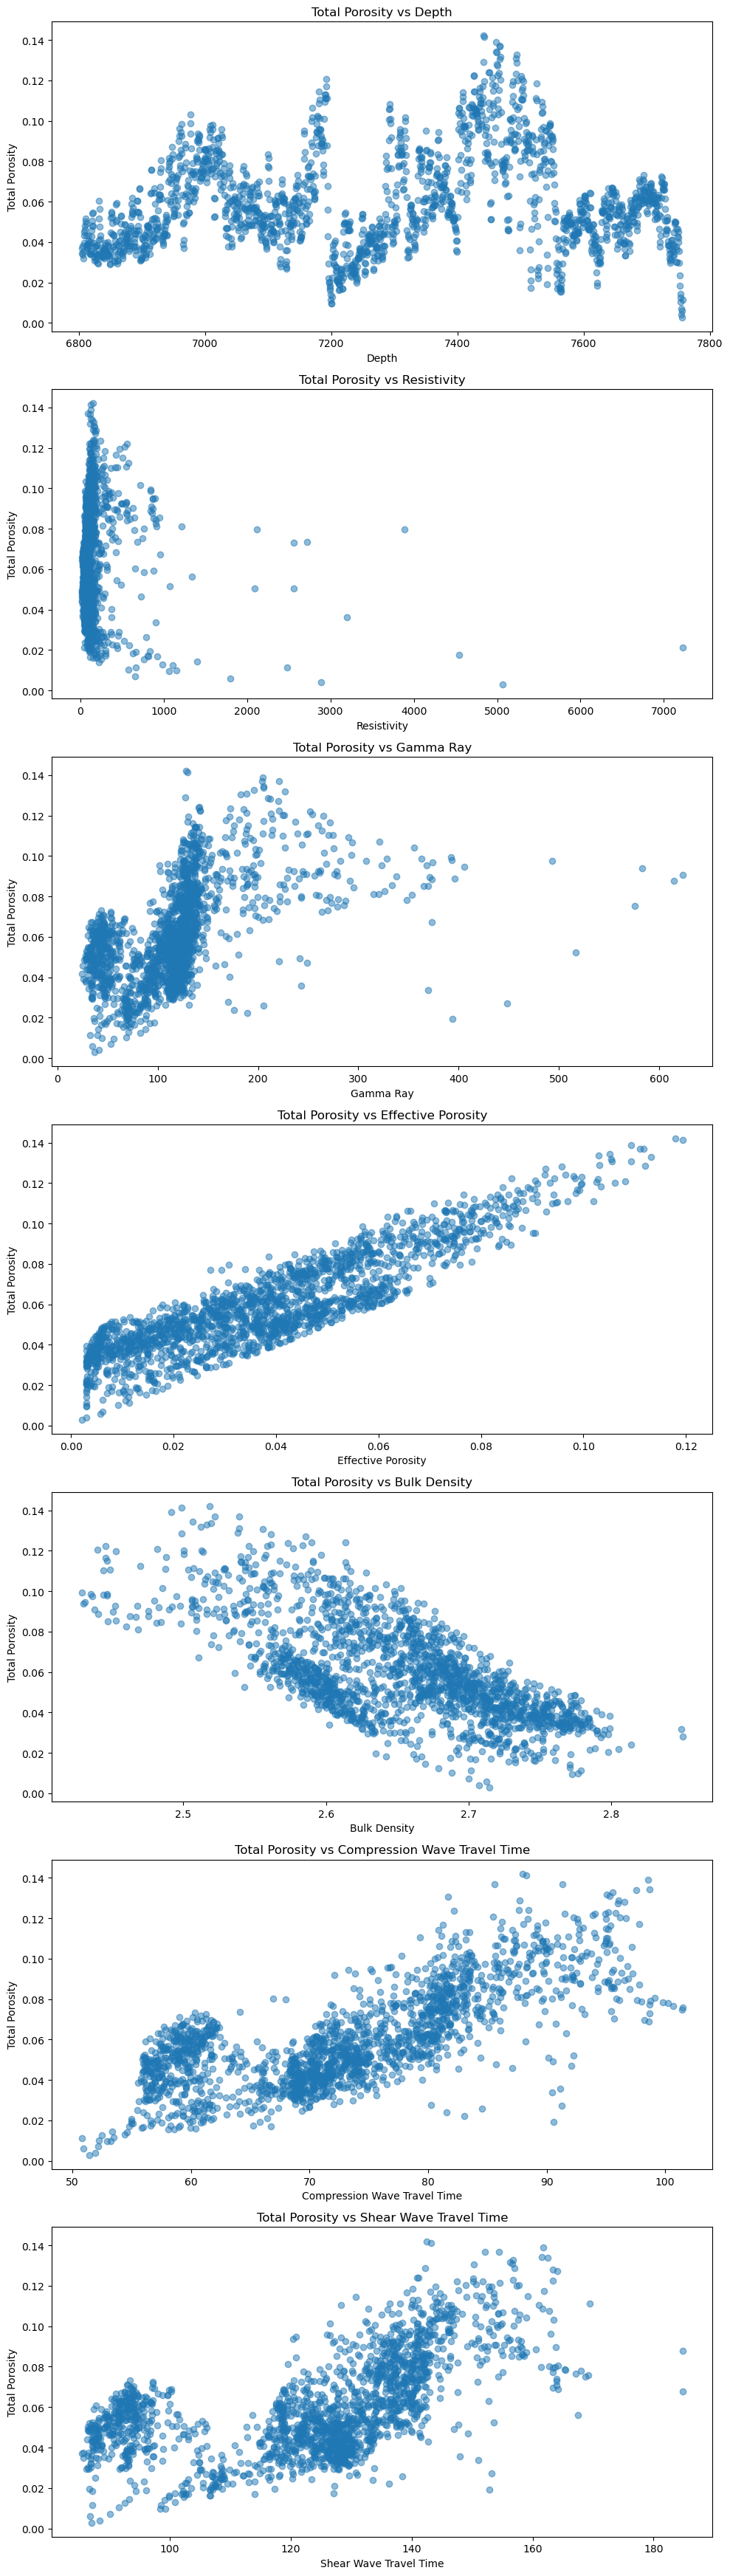

In [142]:
# Extracting columns for plotting
columns_to_plot = ['Depth', 'Resistivity', 'Gamma Ray', 'Effective Porosity', 
                   'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time']

# Plotting Total Porosity versus each selected column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df[column], df['Total Porosity'], alpha=0.5)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Total Porosity')
    axes[i].set_title(f'Total Porosity vs {column}')

plt.tight_layout()
plt.show()

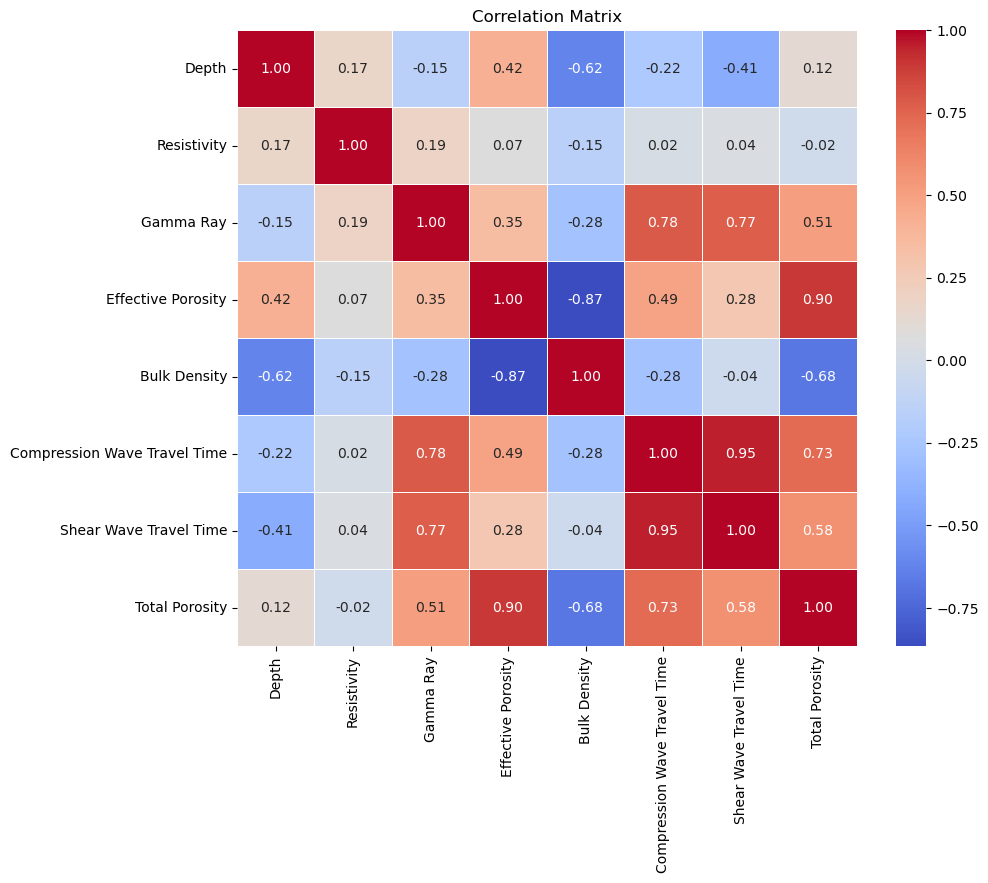

In [92]:
import seaborn as sns

# Selecting columns for the correlation matrix
columns_for_correlation = ['Depth', 'Resistivity', 'Gamma Ray', 'Effective Porosity',
                            'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time', 'Total Porosity']

# Creating a subset DataFrame with selected columns
correlation_df = df[columns_for_correlation]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Let's remove the outliers in the columns in order to improve the correlation and visualization for the Total Porosity

In [86]:
df[(df.Depth > (df.Depth.mean() + 3 * df.Depth.std())) | (df.Depth < (df.Depth.mean() - 3 * df.Depth.std()))] # No outliers
df[(df.Resistivity > (df.Resistivity.mean() + 3 * df.Resistivity.std())) | (df.Resistivity < (df.Resistivity.mean() - 3 * df.Resistivity.std()))] # Outliers detected
df1 = df[(df.Resistivity > (df.Resistivity.mean() + 3 * df.Resistivity.std())) | (df.Resistivity < (df.Resistivity.mean() - 3 * df.Resistivity.std()))] # Outliers removed
#df1 = df[df.Resistivity<=(df.Resistivity.mean()+3*df.Resistivity.std())] # Outlieres removed

df1[(df1['Gamma Ray'] > (df1['Gamma Ray'].mean() + 3 * df1['Gamma Ray'].std())) | (df1['Gamma Ray'] < (df1['Gamma Ray'].mean() - 3 * df1['Gamma Ray'].std()))] # No outliers
df1[(df1['Effective Porosity'] > (df1['Effective Porosity'].mean() + 3 * df1['Effective Porosity'].std())) | (df1['Effective Porosity'] < (df1['Effective Porosity'].mean() - 3 * df1['Effective Porosity'].std()))] # No outliers
df1[(df1['Bulk Density'] > (df1['Bulk Density'].mean() + 3 * df1['Bulk Density'].std())) | (df1['Bulk Density'] < (df1['Bulk Density'].mean() - 3 * df1['Bulk Density'].std()))] # No outliers
df1[(df1['Compression Wave Travel Time'] > (df1['Compression Wave Travel Time'].mean() + 3 * df1['Compression Wave Travel Time'].std())) | (df1['Compression Wave Travel Time'] < (df1['Compression Wave Travel Time'].mean() - 3 * df1['Compression Wave Travel Time'].std()))] # No outliers
df1[(df1['Shear Wave Travel Time'] > (df1['Shear Wave Travel Time'].mean() + 3 * df1['Shear Wave Travel Time'].std())) | (df1['Shear Wave Travel Time'] < (df1['Shear Wave Travel Time'].mean() - 3 * df1['Shear Wave Travel Time'].std()))] # No outliers

df1

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
790,7200.0,1150.05261,44.42971,0.00978,0.00300,2.77636,52.94945,98.42673
1420,7515.0,3199.31958,118.94952,0.03625,0.03160,2.64509,72.61333,130.38377
1421,7515.5,7223.24072,88.68291,0.02109,0.01619,2.69126,66.44210,127.23637
1422,7516.0,4541.37012,96.94482,0.01746,0.01023,2.68718,65.26561,127.10566
1467,7538.5,1212.07397,320.52637,0.08107,0.07812,2.56147,79.35020,135.08603
1468,7539.0,2562.10425,269.22769,0.07305,0.06994,2.57124,75.15755,134.43578
1469,7539.5,2112.32373,271.99020,0.07971,0.07591,2.55278,75.05826,135.66605
1487,7548.5,2715.56982,167.77191,0.07357,0.06143,2.54584,64.14690,125.69941
1488,7549.0,3883.75171,160.49646,0.07981,0.06469,2.53490,68.01165,128.03934
1498,7554.0,2088.51147,130.69493,0.05040,0.04350,2.61553,61.55787,114.45509


In [89]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Scaling could improve the clustering
scaler = StandardScaler()

df1[['Depth', 'Resistivity', 'Total Porosity', 'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time']] = scaler.fit_transform(df1[['Depth', 'Resistivity', 'Total Porosity', 'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time']])

C:\Users\PC\AppData\Local\Temp\ipykernel_12492\28556066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Depth', 'Resistivity', 'Total Porosity', 'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time']] = scaler.fit_transform(df1[['Depth', 'Resistivity', 'Total Porosity', 'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time']])


790    -2.790490
1420   -0.491732
1421   -0.488084
1422   -0.484435
1467   -0.320238
1468   -0.316589
1469   -0.312940
1487   -0.247261
1488   -0.243613
1498   -0.207124
1499   -0.203475
1500   -0.199827
1896    1.245107
1900    1.259702
1901    1.263351
1902    1.267000
1903    1.270648
Name: Depth, dtype: float64

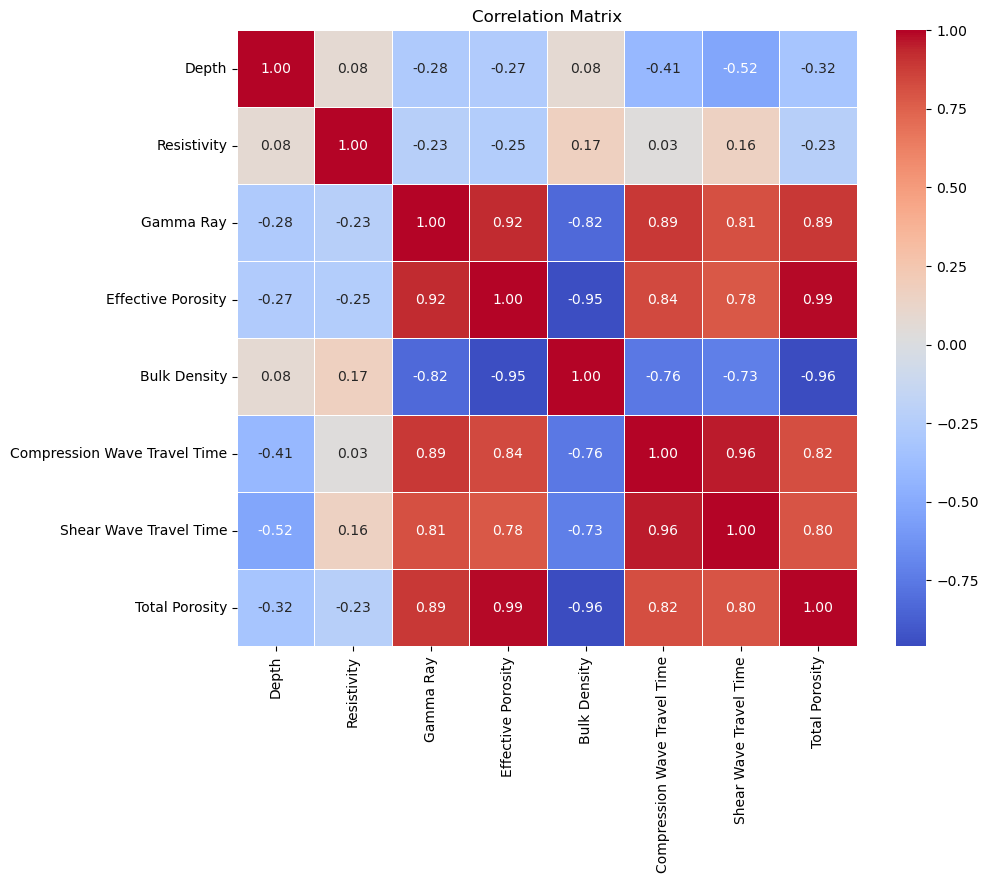

In [88]:
import seaborn as sns

# Selecting columns for the correlation matrix
columns_for_correlation = ['Depth', 'Resistivity', 'Gamma Ray', 'Effective Porosity',
                            'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time', 'Total Porosity']

# Creating a subset DataFrame with selected columns
correlation_df2 = df1[columns_for_correlation]

# Calculating the correlation matrix
correlation_matrix = correlation_df2.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Clearly removing outliers from other columns, improved the strong linear correlation for almost every feature respect to the Total Porosity except for Depth and Resistivity

In [132]:
# So lets prepare our data for the model

input = df1.drop(['Total Porosity', 'Resistivity', 'Depth'], axis='columns')
output = df1['Total Porosity']
input

,Gamma Ray,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
790,44.42971,-1.131902,1.910941,-1.061506,-0.804758
1420,118.94952,-0.082514,0.056564,1.066795,0.927855
1421,88.68291,-0.647936,0.708781,0.398858,0.757213
1422,96.94482,-0.866619,0.651146,0.271522,0.750126
1467,320.52637,1.624393,-1.124689,1.795954,1.182797
1468,269.22769,1.324253,-0.986673,1.342167,1.147543
1469,271.99020,1.543304,-1.247447,1.331420,1.214244
1487,167.77191,1.012005,-1.345485,0.150439,0.673883
1488,160.49646,1.131621,-1.500028,0.568737,0.800747
1498,130.69493,0.354120,-0.361014,-0.129782,0.064251


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input,output,test_size=0.3) 

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge


# Linear Regression GridSearch
param_grid_lr = {
    'fit_intercept': [True, False],
}

lr = LinearRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, return_train_score=False)
grid_search_lr.fit(X_train, y_train)

# Lasso Regression GridSearch
param_grid_lasso = {
    'alpha': [0.1, 0.5, 1, 5, 10, 20],
    'fit_intercept': [True, False],
}

lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, return_train_score=False)
grid_search_lasso.fit(X_train, y_train)

# Ridge Regression GridSearch
param_grid_ridge = {
    'alpha': [0.1, 0.25, 0.35, 0.5, 0.6, 0.7, 1, 5, 10, 20],
    'fit_intercept': [True, False],
}

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, return_train_score=False)
grid_search_ridge.fit(X_train, y_train)

# Convert results to DataFrames
df_lr = pd.DataFrame(grid_search_lr.cv_results_)
df_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
df_ridge = pd.DataFrame(grid_search_ridge.cv_results_)

# Display best parameters and best scores
print("Linear Regression Best Parameters:", grid_search_lr.best_params_)
print("Linear Regression Best Score:", grid_search_lr.best_score_)

print("\nLasso Regression Best Parameters:", grid_search_lasso.best_params_)
print("Lasso Regression Best Score:", grid_search_lasso.best_score_)

print("\nRidge Regression Best Parameters:", grid_search_ridge.best_params_)
print("Ridge Regression Best Score:", grid_search_ridge.best_score_)

Linear Regression Best Parameters: {'fit_intercept': True}
Linear Regression Best Score: 0.29775901607169614

Lasso Regression Best Parameters: {'alpha': 0.1, 'fit_intercept': False}
Lasso Regression Best Score: 0.6325010604245698

Ridge Regression Best Parameters: {'alpha': 0.6, 'fit_intercept': False}
Ridge Regression Best Score: 0.7993990415729931


In [123]:
ridge = Ridge(alpha=0.6, fit_intercept=False)
ridge.fit(X_test, y_test)
ridge.score(X_test, y_test)

0.9891719383742639

In [126]:
ridge.coef_

array([ 2.37639224e-04,  2.91485494e-01, -2.29340329e-01,  1.58995289e-01,
        2.64816731e-01])

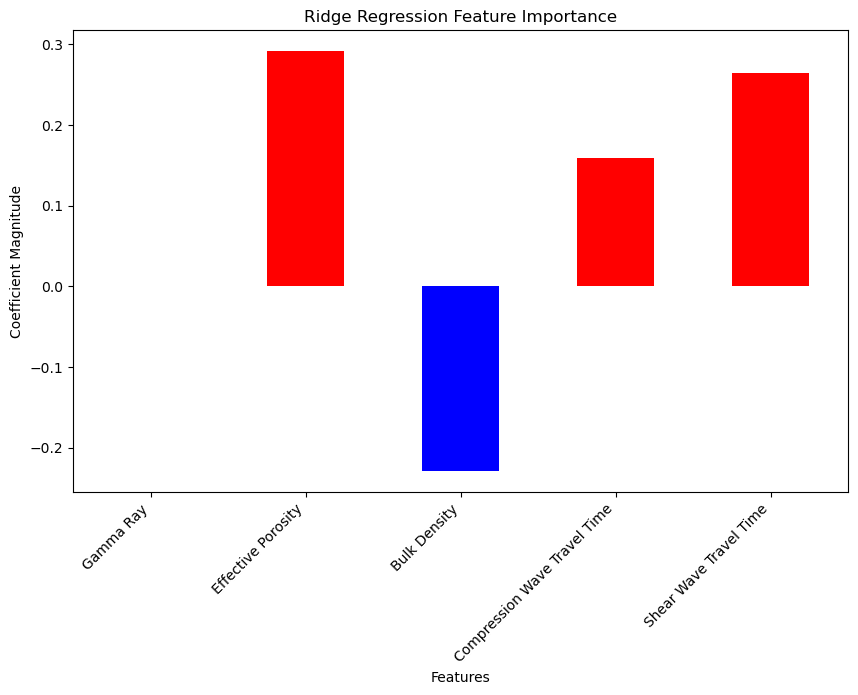

In [141]:
# Feature names
feature_names = ['Gamma Ray', 'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time', 'Shear Wave Travel Time']

# Extract coefficients and feature names
coefficients = ridge.coef_
feature_importance = pd.Series(coefficients, index=feature_names)

# Define colors based on the sign of coefficients
colors = np.where(feature_importance > 0, 'red', 'blue')

# Plotting feature importance with positive in red and negative in blue
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color=colors)
plt.title('Ridge Regression Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=45, ha='right')
plt.show()